In [1]:
import numpy as np
import pandas as pd 
%matplotlib inline
import matplotlib.pyplot as plt 
import seaborn as sns
color = sns.color_palette()
import plotly.express as px
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In this project, We would like to predict laptop prices.<br>
Our goal column is "Price_euros", which we want our model to predict.

In [2]:
df = pd.read_csv("laptop_price.csv",  encoding='latin-1')
df.head(3)

,laptop_ID,Company,Product,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price_euros
0,1,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8GB,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37kg,1339.69
1,2,Apple,Macbook Air,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8GB,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34kg,898.94
2,3,HP,250 G6,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8GB,256GB SSD,Intel HD Graphics 620,No OS,1.86kg,575.00


#### Features's explanation: 

| Features | Company | Product | TypeName | Inches | ScreenResolution | Cpu | Ram | Memory | Gpu | OpSys | Weight | Price_euros |
| --- | --- | --- | --- | --- | --- | --- | --- | --- | --- | --- | --- | --- |
| Type | String | String | String | Numeric | String |String | String | String | String | String | String | Numeric |
| Type | Laptop Manufacturer | Brand and Model | Notebook, Ultrabook, Gaming, etc. | Screen Size | ScreenResolution |Central Processing Unit | Laptop | Hard Disk | Graphics Processing Units | Operating System | Laptop Weight | Price (Euro) |


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1303 entries, 0 to 1302
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   laptop_ID         1303 non-null   int64  
 1   Company           1303 non-null   object 
 2   Product           1303 non-null   object 
 3   TypeName          1303 non-null   object 
 4   Inches            1303 non-null   float64
 5   ScreenResolution  1303 non-null   object 
 6   Cpu               1303 non-null   object 
 7   Ram               1303 non-null   object 
 8   Memory            1303 non-null   object 
 9   Gpu               1303 non-null   object 
 10  OpSys             1303 non-null   object 
 11  Weight            1303 non-null   object 
 12  Price_euros       1303 non-null   float64
dtypes: float64(2), int64(1), object(10)
memory usage: 132.5+ KB


In [4]:
for col in df.columns.to_list():
    print (col ,"have", len(df[col].unique()), "unique values.")

laptop_ID have 1303 unique values.
Company have 19 unique values.
Product have 618 unique values.
TypeName have 6 unique values.
Inches have 18 unique values.
ScreenResolution have 40 unique values.
Cpu have 118 unique values.
Ram have 9 unique values.
Memory have 39 unique values.
Gpu have 110 unique values.
OpSys have 9 unique values.
Weight have 179 unique values.
Price_euros have 791 unique values.


We can see that most columns have a lot of different values.<br>
We will try to see if there are any columns that are not needed and we can remove them before running the models.

In [5]:
# there is no need for the laptop_ID column
df.drop(columns = 'laptop_ID',inplace = True)

In [6]:
# in addition, in "Product" column, we have 618 unique values (out of 1302 values).We will remove this column.
df.drop(columns = 'Product',inplace = True)

In [7]:
# removing 'kg' from the 'Weight' column
df["Weight"] = df["Weight"].str.replace("kg","").astype(np.float32)

### Data Visualization:
We will check the price depending on some features of the laptop.

### Company: 


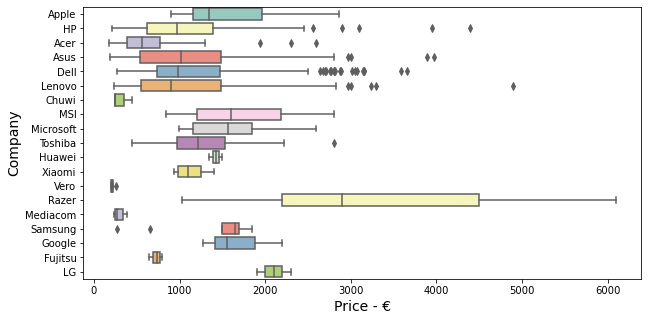

In [8]:
plt.figure(figsize=(10,5))
sns.boxplot(x="Price_euros", y="Company", data=df[["Price_euros","Company"]],palette="Set3")
plt.xlabel("Price - €", size=14)
plt.ylabel("Company", size=14)
plt.show()

| Dell | Lenovo | HP | Asus | Acer | MSI | Toshiba | Apple | Samsung | Razer | Mediacom | Microsoft | Xiaomi | Vero | Chuwi | Google | Fujitsu | LG | Huawei |  
| --- | --- | --- | --- | --- | --- | --- | --- | --- | --- | --- | --- | --- | --- | --- | --- | --- | --- | --- |
| 297 | 297 | 274 | 158 | 103 | 54 | 48 | 21 | 9 | 7 | 7 | 6 | 4 | 4 | 3 | 3 | 3 | 3 | 2 |

We have more than 1300 laptops, and there are 19 different companies.<br>
There are companies with a large amount of devices (like Lenovo and Dell).<br>
The company with the largest median is the Razer with a median of almost 3000 euros<br>
(keep in mind that it has small sample, only of 7 devices).<br>
It seems that the company that manufactures the device is a factor that can cause the price of the device to change,<br>
but the amount of devices in each company is different and unbalanced so we will consider removing the column later.

#### RAM:

In [9]:
# removing 'GB' from the 'Ram' column
df["Ram"] = df["Ram"].str.replace("GB","").astype(np.int32)

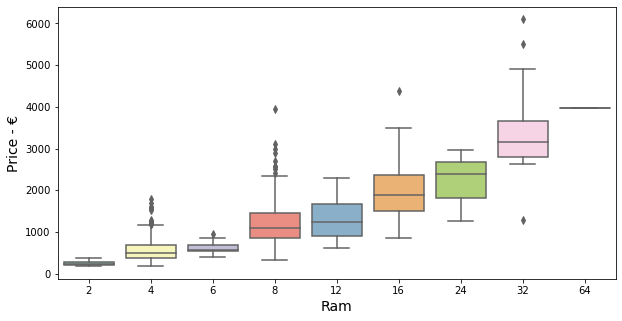

In [10]:
plt.figure(figsize=(10,5))
sns.boxplot(x="Ram", y="Price_euros", data=df[["Ram","Price_euros"]],palette="Set3")
plt.xlabel("Ram", size=14)
plt.ylabel("Price - €", size=14)
plt.show()


It can be clearly seen that the higher the RAM, the higher the price of the computer.<br>
We will look at the correlation between the variables.

<AxesSubplot:>

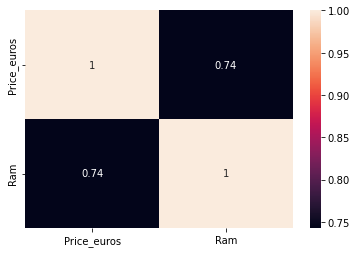

In [11]:
sns.heatmap(df[['Price_euros','Ram']].corr(), annot=True)

### OpSys:

In [12]:
# We will change 'OpSys' columns. We will change the categories of the column to "WindowsOs", "MacOs", "OtherOs" and "No OS"
df['OpSys'] = df['OpSys'].map({"macOS":"MacOS", "No OS":"No OS","Windows 10":"WindowsOS" , "Mac OS X":"MacOS","Linux": "OtherOS",
                               "Android":"OtherOS", "Windows 10 S":"WindowsOS","Chrome OS":"OtherOS","Windows 7":"WindowsOS"})
df['OpSys'].unique()

array(['MacOS', 'No OS', 'WindowsOS', 'OtherOS'], dtype=object)

In [13]:
df[["Price_euros"]].groupby(by = df["OpSys"]).mean()
#We see that there is a difference in the average price relative to the OS type. We will consider this later. 

,Price_euros
OpSys,
MacOS,1564.198571
No OS,587.973333
OtherOS,594.209560
WindowsOS,1189.721484


### Cpu:
In "Cpu" column there are a lot of different values. We will change them to more general values.

(We know there is an easier way to do it (for example with regex),<br> But unfortunately we could not implement it so we chose to leave it that way.

In [14]:
df['Cpu'] = df['Cpu'].replace(['Intel Core i7 7700HQ 2.8GHz', 'Intel Core i7 7500U 2.7GHz', 'Intel Core i7 8550U 1.8GHz', 'Intel Core i7 6920HQ 2.9GHz',
                              'Intel Core i7 2.7GHz', 'Intel Core i7 6500U 2.5GHz', 'Intel Core i7 6700HQ 2.6GHz', 'Intel Core i7 6560U 2.2GHz',
                              'Intel Core i7 2.9GHz', 'Intel Core i7 6600U 2.6GHz', 'Intel Core i7 7600U 2.8GHz', 'Intel Core i7 6820HK 2.7GHz',
                              'Intel Core i7 7820HK 2.9GHz', 'Intel Core i7 6820HQ 2.7GHz', 'Intel Core i7 7Y75 1.3GHz', 'Intel Core i7 7820HQ 2.9GHz',
                              'Intel Core i7 7660U 2.5GHz', 'Intel Core i7 6500U 2.50GHz', 'Intel Core i7 7500U 2.5GHz', 'Intel Core i7 2.2GHz', 'Intel Core i7 2.8GHz',
                              'Intel Core i7 7560U 2.4GHz', 'Intel Core i7 8650U 1.9GHz', 'Intel Core i7 7700HQ 2.7GHz'], 'Intel Core i7')
df['Cpu'] = df['Cpu'].replace(['Intel Core i5 7200U 2.5GHz', 'Intel Core i5 8250U 1.6GHz', 'Intel Core i5 7200U 2.50GHz', 'Intel Core i5 2.9GHz', 'Intel Core i5 7300U 2.6GHz',
                              'Intel Core i5 6440HQ 2.6GHz', 'Intel Core i5 6200U 2.3GHz', 'Intel Core i5 7300HQ 2.5GHz', 'Intel Core i5 2.0GHz', 'Intel Core i5 6300U 2.4GHz',
                              'Intel Core i5 6300HQ 2.3GHz', 'Intel Core i5 7440HQ 2.8GHz', 'Intel Core i5 7Y54 1.2GHz', 'Intel Core i5 1.6GHz', 'Intel Core i5 1.8GHz',
                              'Intel Core i5 3.1GHz', 'Intel Core i5 1.3GHz', 'Intel Core i5 7200U 2.7GHz', 'Intel Core i5 2.3GHz', 'Intel Core i5 7Y57 1.2GHz',
                              'Intel Core i5 6260U 1.8GHz', 'Intel Core i5 7500U 2.7GHz', 'Intel Core i5 7200U 2.70GHz'], 'Intel Core i5')
df['Cpu'] = df['Cpu'].replace(['Intel Core i3 6006U 2GHz', 'Intel Core i3 7100U 2.4GHz', 'Intel Core i3 6006U 2.0GHz', 'Intel Core i3 6100U 2.3GHz', 'Intel Core i3 7130U 2.7GHz',
                              'Intel Core i3 6100U 2.1GHz', 'Intel Core i3 6006U 2.2GHz'], 'Intel Core i3')
df['Cpu'] = df['Cpu'].replace(['Intel Pentium Dual Core 4405U 2.1GHz', 'Intel Core M m3-7Y30 2.2GHz', 'Intel Core M 7Y30 1.0GHz', 'Intel Core M 6Y54 1.1GHz',
                              'Intel Pentium Dual Core N4200 1.1GHz', 'Intel Celeron Quad Core N3710 1.6GHz', 'Intel Core M M3-6Y30 0.9GHz', 'Intel Celeron Dual Core N3350 1.1GHz',
                              'Intel Atom Z8350 1.92GHz', 'Intel Celeron Dual Core N3350 1.1GHz', 'Intel Celeron Dual Core N3060 1.6GHz', 'Intel Pentium Quad Core N4200 1.1GHz',
                              'Intel Pentium Quad Core N3710 1.6GHz', 'Intel Celeron Dual Core N3050 1.6GHz', 'Intel Celeron Quad Core N3450 1.1GHz',
                              'Intel Atom x5-Z8350 1.44GHz', 'Intel Core M 6Y75 1.2GHz', 'Intel Celeron Dual Core 3205U 1.5GHz', 'Intel Atom x5-Z8550 1.44GHz',
                              'Intel Celeron Dual Core 3855U 1.6GHz', 'Intel Core M 6Y30 0.9GHz', 'Intel Xeon E3-1505M V6 3GHz', 'Intel Core M 1.2GHz',
                              'Intel Pentium Quad Core N3700 1.6GHz', 'Intel Celeron Dual Core N3060 1.60GHz', 'Intel Core M m7-6Y75 1.2GHz', 'Intel Celeron Dual Core N3350 2.0GHz',
                              'Intel Atom x5-Z8300 1.44GHz', 'Intel Core M m3 1.2GHz', 'Intel Xeon E3-1535M v5 2.9GHz', 'Intel Celeron Dual Core N3350 2GHz',
                              'Intel Atom X5-Z8350 1.44GHz', 'Intel Core M M7-6Y75 1.2GHz', 'Intel Xeon E3-1535M v6 3.1GHz', 'Intel Pentium Dual Core 4405Y 1.5GHz',
                              'Intel Core M 1.1GHz', 'Intel Celeron Quad Core N3160 1.6GHz'], 'Intel Other')
df['Cpu'] = df['Cpu'].replace(['AMD E-Series 9000e 1.5GHz', 'AMD E-Series E2-6110 1.5GHz', 'AMD E-Series 9000 2.2GHz', 'AMD Ryzen 1600 3.2GHz', 'AMD A9-Series 9420 3GHz',
                              'AMD A6-Series 9220 2.5GHz', 'AMD A12-Series 9720P 3.6GHz', 'AMD A8-Series 7410 2.2GHz', 'AMD A9-Series 9410 2.9GHz', 'AMD Ryzen 1700 3GHz',
                              'AMD A12-Series 9700P 2.5GHz', 'AMD A4-Series 7210 2.2GHz', 'AMD FX 9830P 3GHz', 'AMD E-Series E2-9000 2.2GHz', 'AMD A6-Series 7310 2GHz',
                              'AMD E-Series 6110 1.5GHz', 'AMD A9-Series A9-9420 3GHz', 'AMD A12-Series 9720P 2.7GHz', 'AMD E-Series 7110 1.8GHz', 'AMD FX 8800P 2.1GHz',
                              'AMD A6-Series 9220 2.9GHz', 'AMD A9-Series 9420 2.9GHz', 'AMD A10-Series 9600P 2.4GHz', 'AMD E-Series E2-9000e 1.5GHz', 'AMD A10-Series A10-9620P 2.5GHz',
                              'AMD A6-Series A6-9220 2.5GHz', 'AMD A10-Series 9620P 2.5GHz'], 'AMD')
df['Cpu'] = df['Cpu'].replace(['Samsung Cortex A72&A53 2.0GHz'], 'Other')

In [15]:
df[["Price_euros"]].groupby(by = df["Cpu"]).mean()
#We see that there is a difference in the average price relative to the Cpu type. We will consider this later. 

,Price_euros
Cpu,
AMD,560.638871
Intel Core i3,541.625956
Intel Core i5,1015.015248
Intel Core i7,1595.779108
Intel Other,550.372532
Other,659.000000


### Gpu:

In [16]:
#In "Gpu" column there are a lot of different values. We will split "Gpu" into two cloums "Gpu_company" and "Gpu_type".
df['Gpu_company'] = df['Gpu'].apply(lambda x: x.split(' ')[0])
df['Gpu_type'] = df['Gpu'].apply(lambda x: x.split(' ')[1])
df = df.drop(columns=['Gpu'])

### Inches:

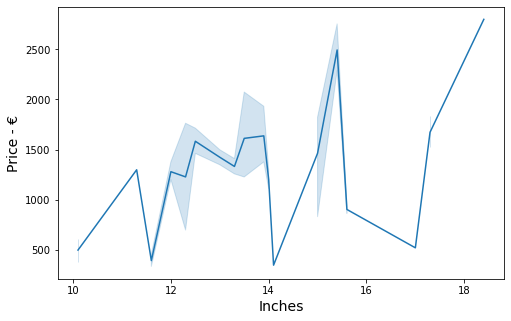

In [17]:
plt.figure(figsize=(8,5))
sns.lineplot(x="Inches", y="Price_euros", data=df[["Inches","Price_euros"]],palette="Set3")
plt.xlabel("Inches", size=14)
plt.ylabel("Price - €", size=14)
plt.show()

From the graph it can be seen that there are inches (like 14, 17),<br>
where the price of the device is significantly lower compared to the other inches.

### Memory:

In [18]:
df['Memory'] = df['Memory'].str.replace('Flash Storage','FlashStorage')
df["Memory"] = df['Memory'] .apply(lambda x: x.split(' ')[1]).astype('string')

### ScreenResolution:

In [19]:
#יש לנו 40 ערכים שונים של רזולוציה, נוציא בכל אחד מהערכים רק את האורך והרוחב של המסך. 

In [20]:
for i,x in enumerate(df['ScreenResolution']):
    stype = x.split(' ')[0]
    if stype not in ['IPS','Full','Touchscreen','Quad','4K']:
        df.loc[i,'ScreenType'] = 'Other'
    else:
        df.loc[i,'ScreenType'] = stype
    width,height = x.split(' ')[-1].split('x')[0],x.split(' ')[-1].split('x')[1]
    df.loc[i,'Width'] = width
    df.loc[i,'Height'] = height
#removing 'ScreenResolution' column
df.drop(columns = 'ScreenResolution',inplace = True)

In [21]:
df["Height"] = df["Height"].astype('int64')
df["Width"] = df["Width"].astype('int64')

##### We need to change the categorial feature  to numeric values.<br> We will use "get_dummies" to change some of the columns, We will change the other columns with the 'map' function<br>

In [23]:
df['Cpu'] = df['Cpu'].map({'Intel Core i7':5, 'Intel Core i5':4, 'Other':3,'AMD':2,'Intel Other':1,'Intel Core i3':0})
df['OpSys'] = df['OpSys'].map({'MacOS':3, 'WindowsOS':2, 'OtherOS':1, 'No OS':0})
df['Gpu_type'] = df['Gpu_type'].map({'GTX':11, 'Quadro':10, 'Iris':9, 'FirePro':8, 'GeForce':7, 'UHD':6, 'HD':5,
                                     'Graphics':4,'R17M-M1-70':3,'Radeon':2,'Mali':1,'R4':0})

In [24]:
data = df.copy()
data = pd.get_dummies(df, columns=['TypeName','Memory','Gpu_company','ScreenType','Company'])

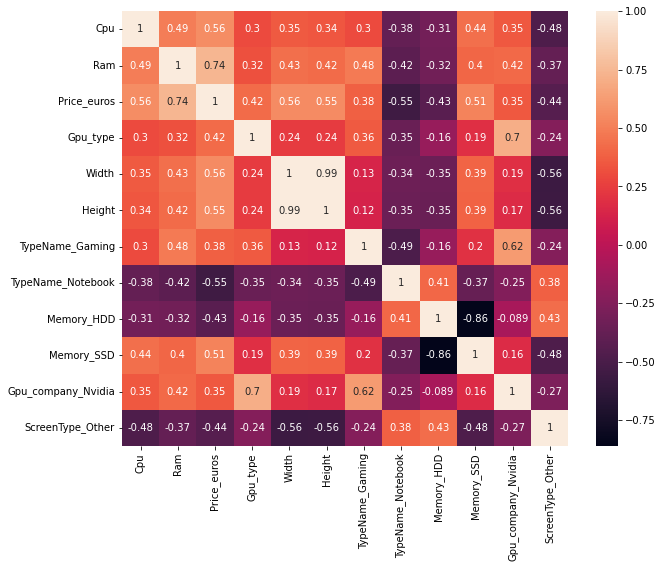

In [25]:
cor_df = data.copy(deep=True)
for (index, col) in enumerate(cor_df):
     if (data['Price_euros'].corr(data[col])) <0.3 and (data['Price_euros'].corr(data[col])) >- 0.3:
        cor_df.drop(columns=col,inplace=True)
fig, ax = plt.subplots(figsize=(10,8))
sns.heatmap(cor_df.corr(), annot=True)
plt.show()

* Ram, SSD, Height, Width and CPU are correlated with Price.
* Width and Height are highly correlated (maybe because of standard screen sizes in the market).

In [26]:
data.head(3)

,Inches,Cpu,Ram,OpSys,Weight,Price_euros,Gpu_type,Width,Height,TypeName_2 in 1 Convertible,...,Company_LG,Company_Lenovo,Company_MSI,Company_Mediacom,Company_Microsoft,Company_Razer,Company_Samsung,Company_Toshiba,Company_Vero,Company_Xiaomi
0,13.3,4,8,3,1.37,1339.69,9,2560,1600,0,...,0,0,0,0,0,0,0,0,0,0
1,13.3,4,8,3,1.34,898.94,5,1440,900,0,...,0,0,0,0,0,0,0,0,0,0
2,15.6,4,8,0,1.86,575.00,5,1920,1080,0,...,0,0,0,0,0,0,0,0,0,0


In [27]:
# Let's split the data into train and test 
from sklearn.model_selection import train_test_split
X = data.drop(columns=["Price_euros"])
y = data["Price_euros"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

#### We chose to use 2 performance measurements: MAE and  R^2:

* Mean Absolute Error: It is the mean of the absolute value of the errors. This is the easiest of the metrics to understand since it’s just average error.

* R-squared is not an error, but rather a popular metric to measure the performance of your regression model. It represents how close the data points are to the fitted regression line. The higher the R-squared value, the better the model fits your data. The best possible score is 1.0 and it can be negative (because the model can be arbitrarily worse).

In [28]:
from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_error

###### We will try first to normalize the data, if we will get bad scores we will try scaling also

In [29]:
from sklearn.preprocessing import MinMaxScaler
norm = MinMaxScaler()
X_train_norm = norm.fit_transform(X_train)
X_test_norm = norm.transform(X_test)

In [30]:
#First, we will run a dummy model. We will try to get better scores with the other models.
from sklearn.dummy import DummyRegressor
dummy_regr = DummyRegressor(strategy="mean")
dummy_regr.fit(X_train_norm, y_train)
R2_score = dummy_regr.score(X_test_norm, y_test)
y_predict = dummy_regr.predict(X_test_norm)
mae = mean_absolute_error(y_test, y_predict)
print('The DummyRegressor -R2 score is:',round(R2_score,4) ,"(close to 0) ,and mean absolute error of" ,round(mae,4))

The DummyRegressor - R2 score is: -0.0041 (close to 0) ,and mean absolute error of 534.3232


#### Models:
We will try several models and in the end we will decide which is the best model.
We will try the following models:

* KNN
* LinearRegression
* XGBRegressor


In [31]:
# KNN
from sklearn.neighbors import KNeighborsRegressor
from sklearn import metrics
knn = KNeighborsRegressor()
knn.fit(X_train_norm,y_train)
y_pred_knn = knn.predict(X_test_norm)
# R^2
r2 = r2_score(y_test, y_pred_knn)
#MAE
mae =mean_absolute_error(y_test, y_pred_knn)
print("MAE:", round(mae,2))
print("R2:", round(r2,2))

MAE: 270.49
R2: 0.64


In [32]:
#LinearRegression
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(X_train_norm,y_train)
y_pred_lr = lr.predict(X_test_norm)
#MAE
mae =mean_absolute_error(y_test, y_pred_lr)
# R^2
r2 = r2_score(y_test, y_pred_lr)
print("MAE:", round(mae,2))
print("R2:", round(r2,2))

MAE: 252.83
R2: 0.76


In [33]:
from xgboost.sklearn import XGBRegressor
XGB = XGBRegressor()
XGB.fit(X_train_norm,y_train)
y_pred_XGB =XGB.predict(X_test_norm)
#MAE
mae =mean_absolute_error(y_test, y_pred_XGB)
# R^2
r2 = r2_score(y_test, y_pred_XGB)
print("MAE:", round(mae,2))
print("R2:", round(r2,2))

MAE: 200.85
R2: 0.82


In [39]:
#אנחנו רואים ש-איקס-גי-בי קיבל את התוצאה הטובה ביותר
# נראה בעזרת ויזואליציה היכן כל מודל טעה, לאחר מכן ננסה בעזרת ראנדום סרצ' לשפר את המודלים. 

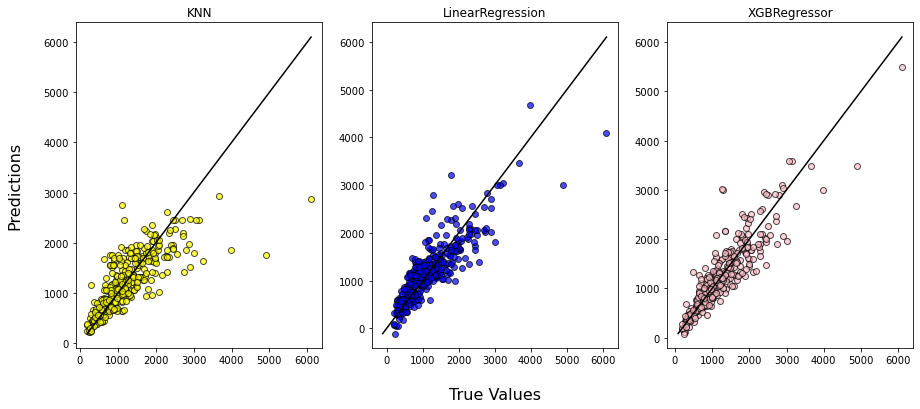

In [79]:
fig, axes = plt.subplots(1,3,figsize=(15,6))
((ax1, ax2,ax3)) = axes
p1 = max(max(y_pred_knn), max(y_test))
p2 = min(min(y_pred_knn), min(y_test))
ax1.plot([p1, p2], [p1, p2], 'black')
ax1.scatter(y_test, y_pred_knn, c = "yellow",alpha=0.7, edgecolors="k")
ax1.set_title('KNN')
ax1.set_ylabel('Predictions\n',size=16)

p1 = max(max(y_pred_lr), max(y_test))
p2 = min(min(y_pred_lr), min(y_test))
ax2.plot([p1, p2], [p1, p2], 'black')
ax2.scatter(y_test, y_pred_lr, c = "blue",alpha=0.7, edgecolors="k")
ax2.set_title('LinearRegression')
ax2.set_xlabel('\nTrue Values',size=16)

p1 = max(max(y_pred_XGB), max(y_test))
p2 = min(min(y_pred_XGB), min(y_test))
ax3.plot([p1, p2], [p1, p2], 'black')
ax3.scatter(y_test, y_pred_XGB, c = "pink",alpha=0.7, edgecolors="k")
ax3.set_title('XGBRegressor')

plt.show()